In [1]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

from aquaponics import Aquaponics

## No Nitrogen ##

In [2]:
a = Aquaponics('fishgrowth', INC_0=0)
m = a.get_model()

tf = 30
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)
m.options.IMODE = 4
m.options.SOLVER = 3

m.solve(disp=False)

Text(0.5,0,'Time (days)')

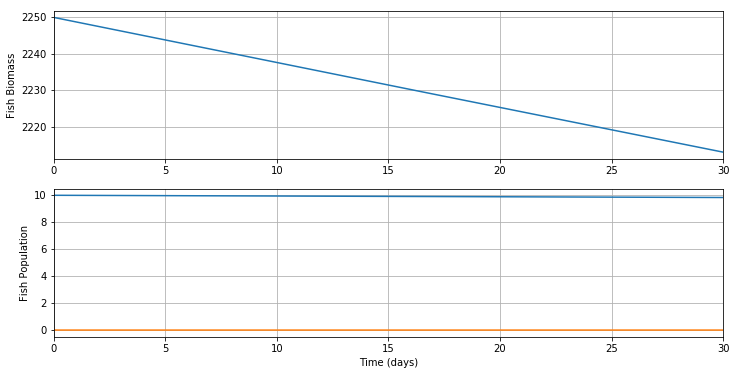

In [3]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.title('Fish Growth (No nitrogen)')
ax = plt.subplot(211)
plt.plot(m.time, a.FB)
plt.grid()
plt.ylabel('Fish Biomass')

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.FP)
plt.plot(m.time, a.FPdt)
plt.grid()
plt.ylabel('Fish Population')

plt.xlim(0, tf)
plt.xlabel('Time (days)')

## Default Nitrogen ##

In [4]:
a = Aquaponics('fishgrowth')
m = a.get_model()

tf = 30
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)
m.options.IMODE = 4
m.options.SOLVER = 3

m.solve(disp=False)

Text(0.5,0,'Time (days)')

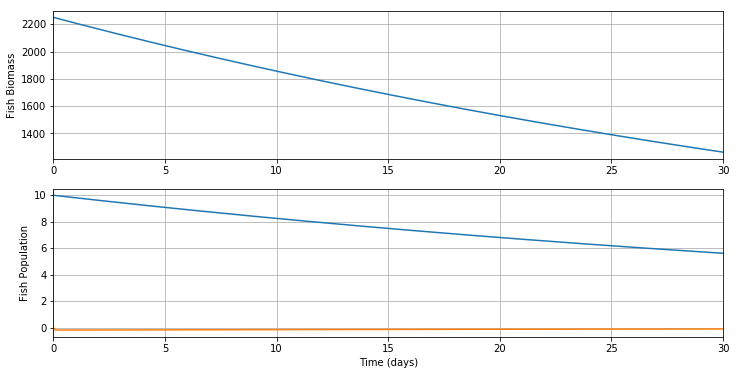

In [5]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.title('Fish Growth (No nitrogen)')
ax = plt.subplot(211)
plt.plot(m.time, a.FB)
plt.grid()
plt.ylabel('Fish Biomass')

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.FP)
plt.plot(m.time, a.FPdt)
plt.grid()
plt.ylabel('Fish Population')

plt.xlim(0, tf)
plt.xlabel('Time (days)')

## Deadly Nitrogen ##

In [6]:
a = Aquaponics('fishgrowth', INC_0=5)
m = a.get_model()

tf = 30
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)
m.options.IMODE = 4
m.options.SOLVER = 3

m.solve(disp=False)

Text(0.5,0,'Time (days)')

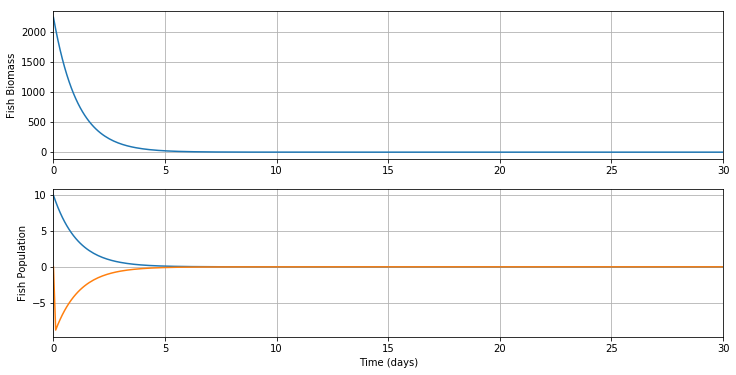

In [7]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.title('Fish Growth (No nitrogen)')
ax = plt.subplot(211)
plt.plot(m.time, a.FB)
plt.grid()
plt.ylabel('Fish Biomass')

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.FP)
plt.plot(m.time, a.FPdt)
plt.grid()
plt.ylabel('Fish Population')

plt.xlim(0, tf)
plt.xlabel('Time (days)')

# km2 Approximation #

Should be 0 for UIA < 0.5, 1 for UIA > 2.

[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39
 0.42 0.45 0.48 0.51 0.54 0.57 0.6  0.63 0.66 0.69 0.72 0.75 0.78 0.81
 0.84 0.87 0.9  0.93 0.96 0.99 1.02 1.05 1.08 1.11 1.14 1.17 1.2  1.23
 1.26 1.29 1.32 1.35 1.38 1.41 1.44 1.47 1.5  1.53 1.56 1.59 1.62 1.65
 1.68 1.71 1.74 1.77 1.8  1.83 1.86 1.89 1.92 1.95 1.98 2.01 2.04 2.07
 2.1  2.13 2.16 2.19 2.22 2.25 2.28 2.31 2.34 2.37 2.4  2.43 2.46 2.49
 2.52 2.55 2.58 2.61 2.64 2.67 2.7  2.73 2.76 2.79 2.82 2.85 2.88 2.91
 2.94 2.97 3.  ]


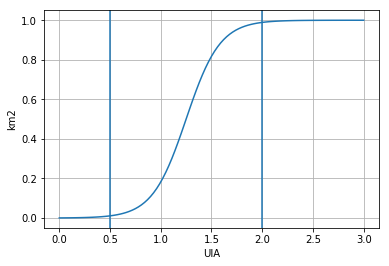

In [8]:
%matplotlib inline
import numpy as np

k = 6
x0 = 1.25

x = np.linspace(0, 3, 101)
fx = lambda x : 1 / (1 + np.exp(-k * (x - x0)))

plt.figure()
plt.plot(x, [fx(xi) for xi in x])
plt.xlabel('UIA')
plt.ylabel('km2')
plt.axvline(0.5)
plt.axvline(2)
plt.grid()
print(x)